Implement:
- Cross-sectional estimator
- Before-after estimator
- Differences-in-differences (DiD) estimator


In [138]:
# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s" % sp.__version__)
import scipy.stats as st

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s" % pd.__version__)

# Module for plotting
import matplotlib 
print("Maplotlib version:    %6.6s" % matplotlib.__version__)
%matplotlib inline
# needed for inline plots in notebooks
import matplotlib.pyplot as plt  

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s" % sklearn.__version__)

import statsmodels.formula.api as smf
import statsmodels.api as sm

Numpy version:        1.13.3
SciPy version:        0.19.1
Pandas version:       0.20.3
Maplotlib version:     2.1.0
Scikit-Learn version: 0.19.1


In [139]:
# Load in data
df = pd.DataFrame.from_csv('yrbs.tsv', sep='\t', header=0, index_col=None)
df

,year,age,sex,meth,tv,state
0,2003,13,M,0,1,XX
1,2003,13,M,1,1,XX
2,2003,13,M,1,1,XX
3,2003,13,M,0,1,XX
4,2003,13,M,0,0,XX
5,2003,13,M,0,1,XX
6,2003,13,M,0,0,XX
7,2003,14,M,0,1,XX
8,2003,14,M,0,1,XX
9,2003,14,M,0,1,XX


In [140]:
# Dimension of data
print(df.shape) # (58077 rows, 6 columns)

# How are variables coded
print(df.dtypes) # year is int64, age is int64, sex is object, meth is int64, tv is int64, state is object

# Are there missings?
print(df.isnull().sum()) # There are no missing data

(58077, 6)
year      int64
age       int64
sex      object
meth      int64
tv        int64
state    object
dtype: object
year     0
age      0
sex      0
meth     0
tv       0
state    0
dtype: int64


In [142]:
# Convert sex to booleans (just do this once!)
# df['sex'] = (df['sex'] == 'M').astype(int)

In [166]:
# Add column: 0 for before campaign (=2003, 2005) and 1 for after campaign (=2007, 2009)
df['campaign'] = np.where(df['year'] < 2006, 0, 1)


In [167]:
df

,year,age,sex,meth,tv,state,campaign
0,2003,13,1,0,1,XX,0
1,2003,13,1,1,1,XX,0
2,2003,13,1,1,1,XX,0
3,2003,13,1,0,1,XX,0
4,2003,13,1,0,0,XX,0
5,2003,13,1,0,1,XX,0
6,2003,13,1,0,0,XX,0
7,2003,14,1,0,1,XX,0
8,2003,14,1,0,1,XX,0
9,2003,14,1,0,1,XX,0


In [168]:
# Setup for plotting mean value of meth use each year
dfMT = df[(df['state'] == 'MT')]
dfNAT = df[(df['state'] == 'XX')]

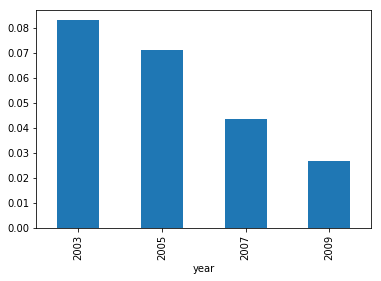

In [169]:
# Plotting mean value of meth use each year for Montana
dfMT.groupby('year')['meth'].mean().plot(kind='bar')

# Meth use in Montana is decreasing each year

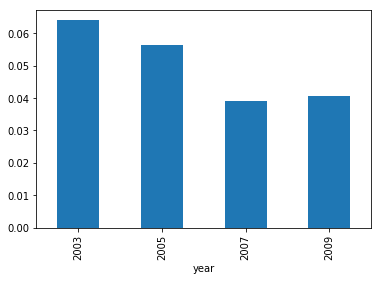

In [170]:
# Plotting mean value of meth use each year for National
dfNAT.groupby('year')['meth'].mean().plot(kind='bar')

# Meth use decreased nationally, until 2009. 2007 saw lowest meth use.

In [171]:
# 3. Before-After Estimator
# Simple table for mean value of meth use before and after in Montana
dfMT.groupby('campaign')['meth'].mean()

# Average use before: 0.076734
# Average use after: 0.038115
# Meth use decreased in Montana after campaign.

campaign
0    0.076734
1    0.038115
Name: meth, dtype: float64

In [172]:
# 3. Before-After Estimator
# Regression for mean value of meth use before and after in Montana
# Without full controls

lmMT = smf.ols(formula = 'meth ~ campaign', data = dfMT).fit()
print(lmMT.summary())

# The coefficient for campaign is negative, so meth use decreased afterwards.
# P-value is 2.19e-16, which is much lower than 0.05, so meth use before and after is statistically significant.

                            OLS Regression Results                            
Dep. Variable:                   meth   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     67.66
Date:                Wed, 07 Feb 2018   Prob (F-statistic):           2.19e-16
Time:                        19:05:06   Log-Likelihood:                 417.76
No. Observations:                9754   AIC:                            -831.5
Df Residuals:                    9752   BIC:                            -817.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0767      0.003     23.106      0.0

In [175]:
# 3. Before-After Estimator
# Regression for mean value of meth use before and after in Montana
# With full controls

lmMT = sm.OLS(dfMT['meth'], sm.add_constant(dfMT[['age', 'sex', 'tv','campaign']])).fit()
lmMT.summary()

# The coefficient for the campaign is negative, so meth use decreased after campaign.
# P-value is 4.11e-19, which is much lower than 0.05, so meth use before and after is statistically significant.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   meth   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     23.20
Date:                Wed, 07 Feb 2018   Prob (F-statistic):           4.11e-19
Time:                        19:05:40   Log-Likelihood:                 430.25
No. Observations:                9754   AIC:                            -850.5
Df Residuals:                    9749   BIC:                            -814.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1090      0.038     -2.889      0.004      -0.183      -0.035
age            0.0118      0.002      4.953      0.000       0.007       0.016
sex           -0.0031      0.005     -0.653      0.514      -0.012       0.006
tv             0.0035      0.005      0.739      0.460      -0.006       0.013
campaign      -0.0386      0.005     -8.221      0.000      -0.048      -0.029
==============================================================================
Omnibus:                     7302.251   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            83719.425
Skew:                           3.750   Prob(JB):                         0.00
Kurtosis:                      15.237   Cond. No.                         255.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
# 4. Cross-Sectional Estimator
# Simple table for mean value of meth use before and after in National
dfNAT.groupby('campaign')['meth'].mean()

# Average use before: 0.060319
# Average use after: 0.039923
# Meth use decreased nationally after campaign.

campaign
0    0.060319
1    0.039923
Name: meth, dtype: float64

In [178]:
# 4. Cross-Sectional Estimator
# Regression for mean value of meth use before and after in National
# Without full controls
lmNAT = smf.ols(formula = 'meth ~ campaign', data = dfNAT).fit()
print(lmNAT.summary())

# The coefficient for campaign is negative, so meth use decreased afterwards.
# P-value is 6.75e-25, which is much lower than 0.05, so meth use before and after is statistically significant.

                            OLS Regression Results                            
Dep. Variable:                   meth   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     106.3
Date:                Wed, 07 Feb 2018   Prob (F-statistic):           6.75e-25
Time:                        19:08:10   Log-Likelihood:                 5183.8
No. Observations:               48323   AIC:                        -1.036e+04
Df Residuals:                   48321   BIC:                        -1.035e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0603      0.001     42.518      0.0

In [179]:
# 4. Cross-Sectional Estimator
# Regression for mean value of meth use before and after in National
# With full controls

lmNAT = sm.OLS(dfNAT['meth'],sm.add_constant(dfNAT[['age', 'sex', 'tv','campaign']])).fit()
print(lmNAT.summary())

# The coefficient for campaign is negative, so meth use decreased afterwards.
# P-value is 9.89e-36, which is much lower than 0.05, so meth use before and after is statistically significant.

                            OLS Regression Results                            
Dep. Variable:                   meth   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     42.60
Date:                Wed, 07 Feb 2018   Prob (F-statistic):           9.89e-36
Time:                        19:09:36   Log-Likelihood:                 5215.8
No. Observations:               48323   AIC:                        -1.042e+04
Df Residuals:                   48318   BIC:                        -1.038e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0355      0.016     -2.249      0.0

In [134]:
# 5. Differences-in-Differences Estimator
# Simple table pre-project and post-project years
did = df.groupby("campaign")['meth'].mean()
print(did)

effect = did['before'] - did['after']
print(effect)

# Average use before: 0.063142
# Average use after: 0.039626
# Effect by trend difference: 0.0235156151484

campaign
after     0.039626
before    0.063142
Name: meth, dtype: float64
0.0235156151484


In [183]:
# 5. Differences-in-Differences Estimator
# Regression
# Without full controls
lmAll = smf.ols(formula = 'meth ~ campaign', data = df).fit()
print(lmAll.summary())

# The coefficient for campaign is negative, so meth use decreased afterwards.
# P-value is 6.42e-38, which is much lower than 0.05, so meth use before and after is statistically significant.

                            OLS Regression Results                            
Dep. Variable:                   meth   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     165.9
Date:                Wed, 07 Feb 2018   Prob (F-statistic):           6.42e-38
Time:                        19:12:22   Log-Likelihood:                 5555.5
No. Observations:               58077   AIC:                        -1.111e+04
Df Residuals:                   58075   BIC:                        -1.109e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0631      0.001     48.346      0.0

In [184]:
# 5. Differences-in-Differences Estimator
# Regression
# With full controls

lmAll = sm.OLS(df['meth'],sm.add_constant(df[['age', 'sex', 'tv','campaign']])).fit()
print(lmAll.summary())

# The coefficient for campaign is negative, so meth use decreased afterwards.
# P-value is 2.98e-51, which is much lower than 0.05, so meth use before and after is statistically significant.

                            OLS Regression Results                            
Dep. Variable:                   meth   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     60.70
Date:                Wed, 07 Feb 2018   Prob (F-statistic):           2.98e-51
Time:                        19:12:22   Log-Likelihood:                 5593.8
No. Observations:               58077   AIC:                        -1.118e+04
Df Residuals:                   58072   BIC:                        -1.113e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0448      0.015     -3.077      0.0